# Linear Classification

## Binary Classification

Iris dataset을 사용한 binary classification 실습

### Import dataset

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris)) 

<class 'sklearn.utils.Bunch'>


In [5]:
print(iris.feature_names) # 4 features
print(iris.target_names)  # 3 labels

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
X, y = iris.data, iris.target
print(X.shape, type(X))
print(y.shape, type(y))

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


### Make to binary classification dataset

In [13]:
X2 = X[:, :2]   # first two features

Text(0, 0.5, 'Sepal width')

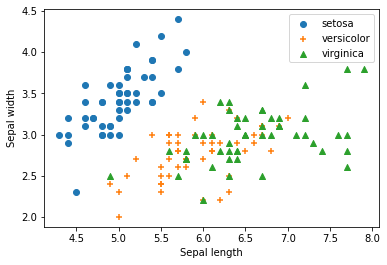

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

위의 label 분포를 보면 setosa와 versicolor&virginica 로 크게 이진 분류를 할 수 있다. 

따라서 label의 virginica를 모두 versicolor로 바꿔서 이진 분류 데이터로 바꾼다. 

Text(0, 0.5, 'Sepal width')

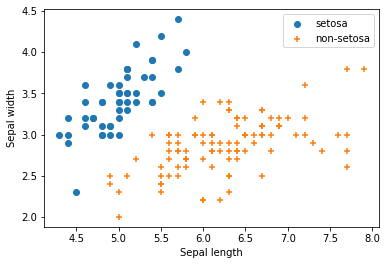

In [15]:
y2 = y.copy()      # y의 복사본을 만든다
y2[(y2==2)] = 1    # y중에 2의 값을 모두 1로 바꾼다 -> 이진 분류
y2

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y2 == i]
    ys = X2[:, 1][y2 == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

### Split train/test dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

Text(0, 0.5, 'Sepal width')

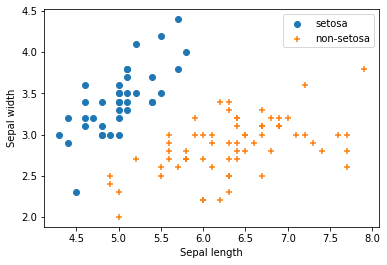

In [17]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

### Select Model and Train

In [18]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=2000, random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(max_iter=2000, random_state=42)

In [19]:
clf.coef_, clf.intercept_

(array([[  98.14963797, -139.44757308]]), array([-90.4188475]))

In [20]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
print(a, b, c)

98.1496379726464 -139.44757307589103 [-90.4188475]


### Inference and Plotting

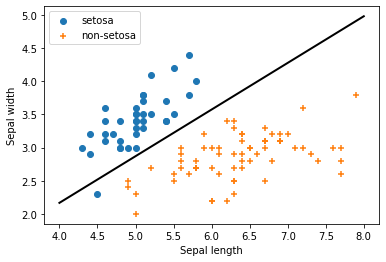

In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [22]:
print(clf.predict([[4.5, 3.5]]))  # 0

[0]


In [23]:
print(clf.score(X2, y2))

0.9933333333333333


In [24]:
print(clf.score(X_test, y_test))

1.0


#### Use KFold and cross_val_score

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import SGDClassifier

cv = KFold(n_splits=5, shuffle=True)

'''
X2.shape[0]
y

for train_index, test_index in cv.split(X2):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X2[train_index], X2[test_index]
   y_train, y_test = y2[train_index], y2[test_index]
'''

# 위의 과정을 한 번에 해 주는 함수가 있음.
score = cross_val_score(SGDClassifier(), X2, y2, cv=cv)
print(score, score.mean())

[1.         0.96666667 0.96666667 1.         0.8       ] 0.9466666666666667


## Different classes

Text(0, 0.5, 'Sepal width')

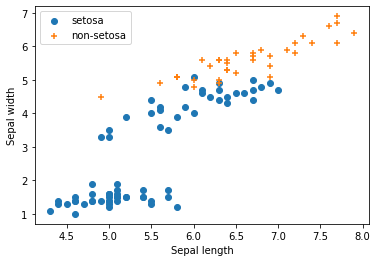

In [198]:
iris = load_iris()
X, y = iris.data, iris.target
X3 = X[:,[0,2]]
y3 = y.copy()
y3[y3 == 1] = 0
y3[y3 == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=17)

markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [225]:
clf1 = SGDClassifier(penalty='l2', alpha=0.0001, random_state=42)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.9111111111111111

In [227]:
clf2 = SGDClassifier(penalty='l2', alpha=1, random_state=42)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.6888888888888889

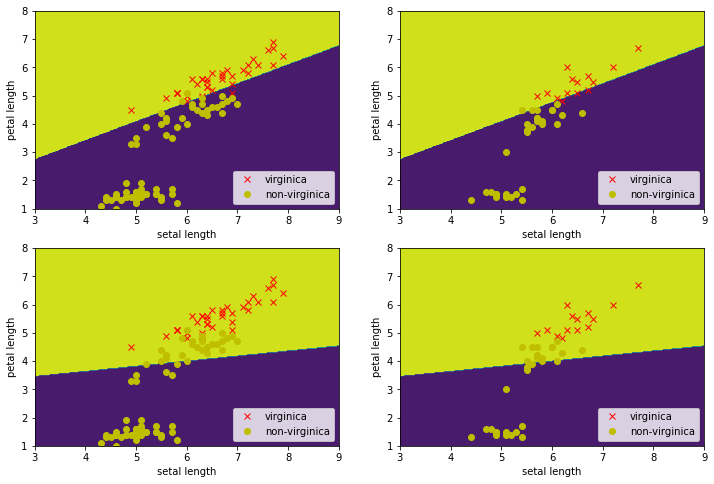

In [228]:
x0, x1 = np.meshgrid(
        np.linspace(3, 9, 200).reshape(-1, 1),
        np.linspace(1, 8, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict1 = clf1.predict(X_new)
y_predict2 = clf2.predict(X_new)

zz1 = y_predict1.reshape(x0.shape)
zz2 = y_predict2.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)

plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "rx", label="virginica")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz1)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")

plt.subplot(2,2,2)
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "rx", label="virginica")
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz1)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")

plt.subplot(2,2,3)
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "rx", label="virginica")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz2)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")

plt.subplot(2,2,4)
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "rx", label="virginica")
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz2)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")
plt.show()

In [229]:
clf1.coef_, clf2.coef_

(array([[-151.63660655,  225.78490314]]), array([[-0.07619048,  0.42329004]]))